In [48]:
import autograd.numpy as np
from autograd import jacobian
import pandas as pd
import math
from scipy import linalg
import matplotlib.pyplot as plt

In [49]:
def func(x):
    return math.sin(math.sin(x))

In [50]:
def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    integration = func(a) + func(b)

    for i in range(1, n):
        k = a + i*h
        integration = integration + 2 * func(k)

    integration = integration * h/2
    
    return integration

Мы знаем, что $\varepsilon_{\text{trapezoidal}} = \frac{(b - a)f''(\eta)}{12}h^2 = \mathcal{O}(h^2)$ для всего интервала, поэтому при увеличении разбиения мы будем получать все более точные результаты численного интегрирования. Заметим, что вторая производная нашей функции есть $|-cos(sin(x)) sin(x) - cos^2(x) sin(sin(x))| \leq 1$. Будем рассчитывать погрешность интегрирования и записывать в массив, дабы оценить скорость сходимости ошибки:

In [51]:
def error_trap(a, b, n):
    h = (b - a) / n
    return (b - a) * (h ** 2) / 12

In [52]:
a = 0
b = math.pi

In [53]:
values = []
errors = []
i = 1
while True:
    if error_trap(a, b, i) < 10e-4:
        values.append(trapezoidal_rule(func, a, b, i))
        errors.append(error_trap(a, b, i))
        break
    else:
        values.append(trapezoidal_rule(func, a, b, i))
        errors.append(error_trap(a, b, i))
        i += 1

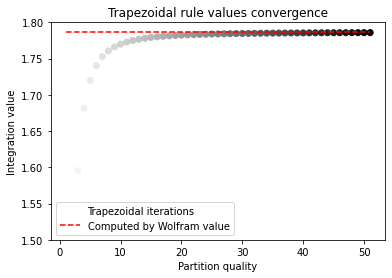

In [56]:
fig, ax = plt.subplots()
plt.title(r"Trapezoidal rule values convergence")
ax.set_ylabel(r"Integration value")
ax.set_ylim(1.5, 1.8)
ax.set_xlabel(r"Partition quality")

iterations = [i + 1 for i in range(len(values))]

plt.scatter(iterations, values, c=iterations, cmap='binary', label=r'Trapezoidal iterations')
plt.plot(iterations, [1.78649 for i in range(len(iterations))], linestyle='--', color='red', label="Computed by Wolfram value")

ax.legend(loc='best')

plt.show()

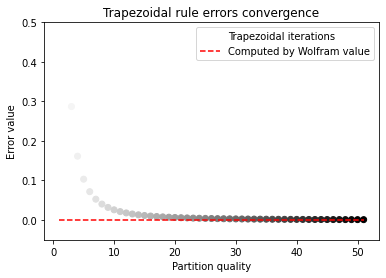

In [57]:
fig, ax = plt.subplots()
plt.title(r"Trapezoidal rule errors convergence")
ax.set_ylabel(r"Error value")
ax.set_ylim(-0.05, 0.5)
ax.set_xlabel(r"Partition quality")

iterations = [i + 1 for i in range(len(values))]

plt.scatter(iterations, errors, c=iterations, cmap='binary', label=r'Trapezoidal iterations')
plt.plot(iterations, [10e-4 for i in range(len(iterations))], linestyle='--', color='red', label="Computed by Wolfram value")

ax.legend(loc='best')

plt.show()

Как мы можем заметить из графиков, у нас получилось практически мгновенная сходимость до точности в 0.01 за первые 5 итераций, а вот после мы получаем медленную сходимость из-за уменьшения шага разбиения

Экстраполяция Ричардсона позволяет увеличить скорость сходимости значений из-за увеличения мелкости разбиения до $\mathcal{O}(h^3)$: 

In [58]:
values_rich = []
errors_rich = []
i = 1
while True:
    if error_trap(a, b, 2 * i) < 10e-4:
        values_rich.append(trapezoidal_rule(func, a, b, 2 * i))
        errors_rich.append(error_trap(a, b, 2 * i))
        break
    else:
        values_rich.append(trapezoidal_rule(func, a, b, 2 * i))
        errors_rich.append(error_trap(a, b, 2 * i))
        i += 1

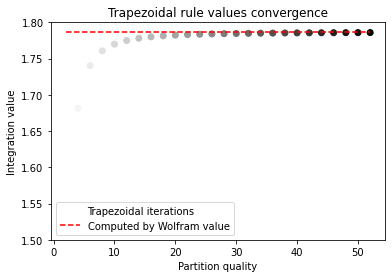

In [62]:
fig, ax = plt.subplots()
plt.title(r"Trapezoidal rule values convergence")
ax.set_ylabel(r"Integration value")
ax.set_ylim(1.5, 1.8)
ax.set_xlabel(r"Partition quality")

iterations = [2 * (i + 1) for i in range(len(values_rich))]

plt.scatter(iterations, values_rich, c=iterations, cmap='binary', label=r'Trapezoidal iterations')
plt.plot(iterations, [1.78649 for i in range(len(iterations))], linestyle='--', color='red', label="Computed by Wolfram value")

ax.legend(loc='best')

plt.show()

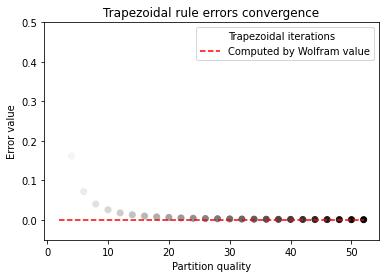

In [63]:
fig, ax = plt.subplots()
plt.title(r"Trapezoidal rule errors convergence")
ax.set_ylabel(r"Error value")
ax.set_ylim(-0.05, 0.5)
ax.set_xlabel(r"Partition quality")

iterations = [2 * (i + 1) for i in range(len(errors_rich))]

plt.scatter(iterations, errors_rich, c=iterations, cmap='binary', label=r'Trapezoidal iterations')
plt.plot(iterations, [10e-4 for i in range(len(iterations))], linestyle='--', color='red', label="Computed by Wolfram value")

ax.legend(loc='best')

plt.show()

Как мы можем видеть, количество вызовов численного интегрирования на такой сетке упало вдвое, что соответствует теоретическим выкладкам.